Proyecto Final - Grupo No. 3

Integrantes:
- Arantxa Andrea Castañeda Samayoa 24003131
- Nelson Francisco Monterrozo Avila 12140173
- Mayra Escarleth Roman Betancourt 12288004



2. Usando sclicing con NumPy separar los datos en 2 datasets: entrenamiento(80%) y validación y pruebas(20%)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Carga datos
dataset = np.load(r"C:\Users\MERCA25\Downloads\proyecto_data (2)\proyecto_data\proyecto_training_data.npy")

# division datos: 80% para entrenamiento y 20% para prueba
X_train, X_test = train_test_split(dataset, test_size=0.2, random_state=42)
# Entrenamiento: 80% de los datos.
# Prueba: 20% de los datos.

# Validación tamaño de los datos
print(f"Tamaño del conjunto entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto prueba: {X_test.shape}")

Tamaño del conjunto entrenamiento: (1168, 6)
Tamaño del conjunto prueba: (292, 6)


3. Análisis exploratorio de datos: Para cada variable en el dataset calcular (usando numpy o  pandas):
 - media
 - valor máximo
 - valor mínimo
 - rango(peak to peak, no el rango del tensor que por ser vector sabemos que es 1)
 - desviación estándar.
 4. Para cada variable en el dataset usar seaborn(función distplot https://seaborn.pydata. org/generated/seaborn.distplot.html) para graficar un histograma de la variable.


Análisis Exploratorio por variable en el conjunto de entrenamiento:
Análisis para Var_0:
  - Media: 181441.54
  - Valor máximo: 745000.0
  - Valor mínimo: 34900.0
  - Rango: 710100.0
  - Desviación estándar: 77263.58


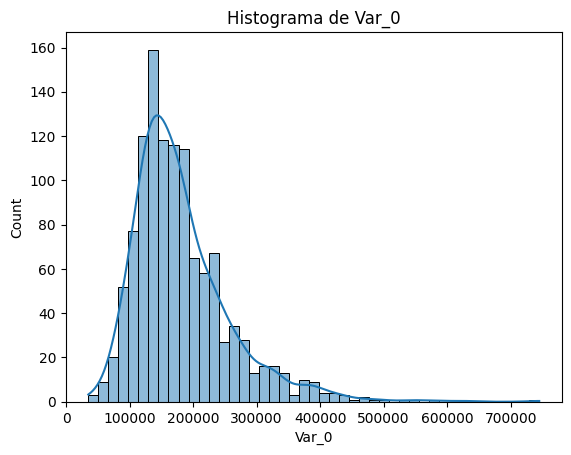

Análisis para Var_1:
  - Media: 6.12
  - Valor máximo: 10.0
  - Valor mínimo: 1.0
  - Rango: 9.0
  - Desviación estándar: 1.37


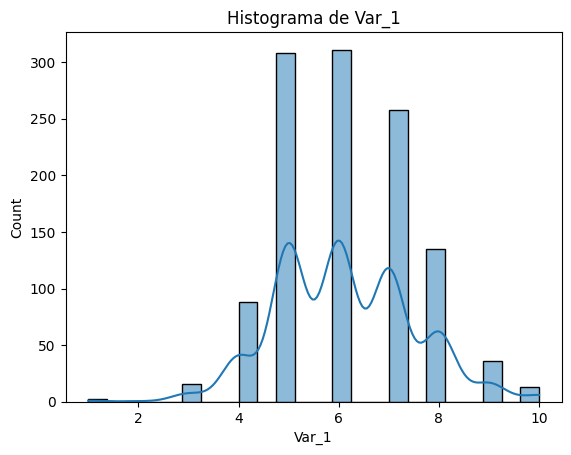

Análisis para Var_2:
  - Media: 1169.35
  - Valor máximo: 4692.0
  - Valor mínimo: 334.0
  - Rango: 4358.0
  - Desviación estándar: 386.68


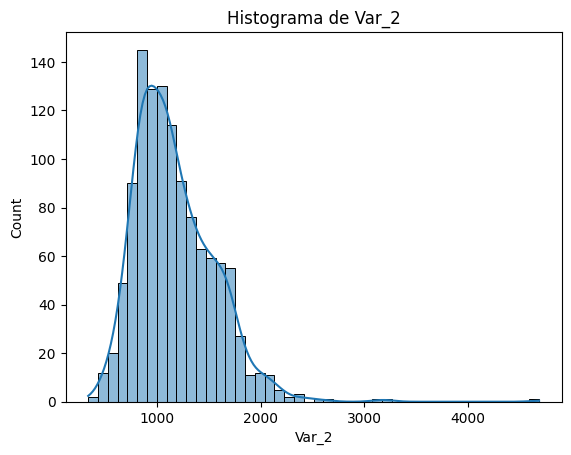

Análisis para Var_3:
  - Media: 6.56
  - Valor máximo: 14.0
  - Valor mínimo: 2.0
  - Rango: 12.0
  - Desviación estándar: 1.62


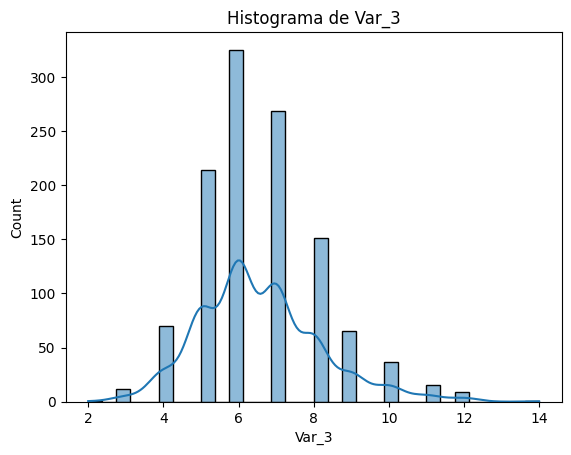

Análisis para Var_4:
  - Media: 1970.97
  - Valor máximo: 2010.0
  - Valor mínimo: 1872.0
  - Rango: 138.0
  - Desviación estándar: 30.68


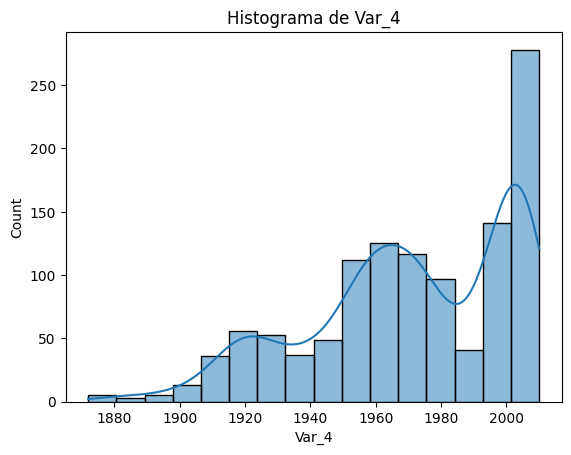

Análisis para Var_5:
  - Media: 70.34
  - Valor máximo: 313.0
  - Valor mínimo: 21.0
  - Rango: 292.0
  - Desviación estándar: 24.9


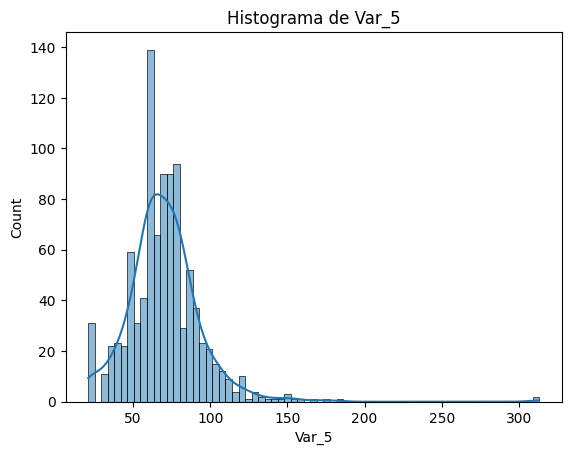

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Convertir dataset entrenamiento a DataFrame de pandas
df_train = pd.DataFrame(X_train, columns=[f'Var_{i}' for i in range(X_train.shape[1])])

print("Análisis Exploratorio por variable en el conjunto de entrenamiento:")

for col in df_train.columns:
    print(f"Análisis para {col}:")
    print(f"  - Media: {round(df_train[col].mean(), 2)}")
    print(f"  - Valor máximo: {df_train[col].max()}")
    print(f"  - Valor mínimo: {df_train[col].min()}")
    print(f"  - Rango: {df_train[col].max() - df_train[col].min()}")
    print(f"  - Desviación estándar: {round(df_train[col].std(), 2)}")
    
    # histograma para cada variable
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.show()

 5. Para cada variable independiente x :
    - Calcular el coeficiente de correlaci´on entre x y y.
    - Graficar x vs y(scatterplot) usando matplotlib.
    - Colocar el coeficiente de correlaci´on y colocarlo como parte del título de la gráfica.
    - Basado en la gráfica y el coeficiente de correlación de cada par x,y elegir las 2 variables con más potencial predictivo es decir las 2 variables que presentan mayor correlación entre dicha variable y la variable dependiente

Error modelo manual: 0.47999999999999987
Error modelo sklearn: 0.47999999999999987


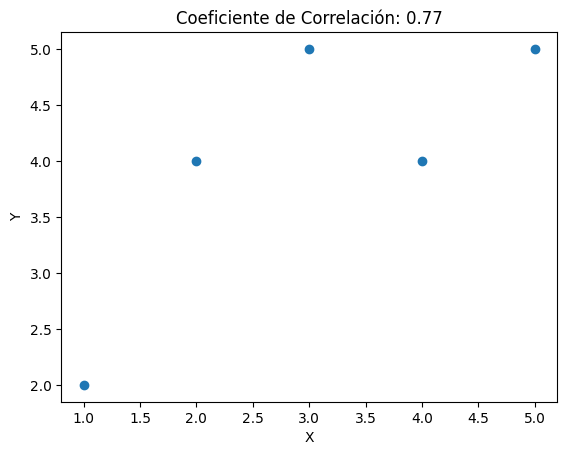

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

class Variable:
    def __init__(self):
        self.model_sklearn = None
        self.model_manual = None

    def entrenar_modelo_sklearn(self, x, y):
        # Entrenamiento del modelo
        modelo = LinearRegression()
        modelo.fit(x.reshape(-1, 1), y)
        self.model_sklearn = modelo

    def entrenar_modelo_manual(self, x, y):
        # Entrenamiento manual 
        X_manual = np.c_[x, np.ones(x.shape[0])] 
        self.model_manual = np.linalg.inv(X_manual.T @ X_manual) @ X_manual.T @ y

    def evaluar_modelo(self, x, y):
        # Prediccion de los modelos
        x_manual = np.c_[x, np.ones(x.shape[0])]
        y_pred_manual = np.dot(x_manual, self.model_manual)
        y_pred_sklearn = self.model_sklearn.predict(x.reshape(-1, 1))
        
        # Calculo de error
        error_manual = mean_squared_error(y, y_pred_manual)
        error_sklearn = mean_squared_error(y, y_pred_sklearn)
        
        print(f'Error modelo manual: {error_manual}')
        print(f'Error modelo sklearn: {error_sklearn}')
        
        return error_manual, error_sklearn

    def analizar_correlacion(self, x, y):
        # Coeficiente de correlación entre x e y
        coef_correlacion = np.corrcoef(x, y)[0, 1]
        
        # Graficar x vrs y
        plt.scatter(x, y)
        plt.title(f'Coeficiente de Correlación: {coef_correlacion:.2f}')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.show()
        
        return coef_correlacion

x = np.array([1, 2, 3, 4, 5])  # Datos variable independiente
y = np.array([2, 4, 5, 4, 5])  # Datos variable dependiente

objeto = Variable()

# Entrenamiento de ambos modelos
objeto.entrenar_modelo_sklearn(x, y)
objeto.entrenar_modelo_manual(x, y)

# Evaluacion del modelo
error_manual, error_sklearn = objeto.evaluar_modelo(x, y)

# Analisis de correlacion
coef_correlacion = objeto.analizar_correlacion(x, y)

 6. Crear una función para entrenar un modelo de regresión lineal de una variable y = β0+β1∗x.
 La funcióon recibe como argumentos:
    - 6.1 Vector con la variable independiente x,
    - 6.2 Vector con la variable dependiente y,
    - 6.3 un entero epochs que indica por cuantas iteraciones entrenar el modelo.
    - 6.4 un entero imprimir_error_cada , que nos indica cada cuantas iteraciones queremos imprimir a través de print: el número de iteración, el error del modelo en esa iteración, si imprimir_error_cada = 10, se despliega en pantalla el error en las iteraciones: 10,20,30,40,50.
    - 6.5 escalar α(learning rate): es usado como parte de la expresión matemática para actualizar en cada iteración los parámetros del modelo.

In [ ]:
import numpy as np

def entrenar_regresion_lineal(x, y, epochs, imprimir_error_cada, alpha):
    """
    Entrena un modelo de regresión lineal simple (y = β0 + β1 * x) usando gradiente descendente.

    Parámetros:
    - x: Vector con variable independiente.
    - y: Vector con variable dependiente.
    - epochs: Número de iteraciones.
    - imprimir_error_cada: Cada cuántas iteraciones imprimir el error.
    - alpha: Tasa de aprendizaje
    
    Retorna:
    - beta_0, beta_1: Parámetros del modelo entrenado.
    """
    beta_0 = 0  # Intercepto
    beta_1 = 0  # Pendiente
    m = len(x)  # Número de datos

    for epoch in range(1, epochs + 1):
        # Predicciones de los parámetros
        y_pred = beta_0 + beta_1 * x

        # Calculo del error cuadrático medio (MSE)
        error = np.mean((y - y_pred) ** 2)

        grad_beta_0 = -2 * np.mean(y - y_pred)  # respecto a beta_0
        grad_beta_1 = -2 * np.mean((y - y_pred) * x)  # respecto a beta_1

        beta_0 -= alpha * grad_beta_0
        beta_1 -= alpha * grad_beta_1

        # Imprimir error en cada 10 iteraciones
        if epoch % imprimir_error_cada == 0:
            print(f"Iteración {epoch}: Error = {error:.5f}")

    return beta_0, beta_1

x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10]) 

beta_0, beta_1 = entrenar_regresion_lineal(x, y, epochs=100, imprimir_error_cada=10, alpha=0.01)
print(f"Modelo entrenado: y = {beta_0:.3f} + {beta_1:.3f} * x")

Iteración 10: Error = 0.38599
Iteración 20: Error = 0.04390
Iteración 30: Error = 0.03960
Iteración 40: Error = 0.03700
Iteración 50: Error = 0.03457
Iteración 60: Error = 0.03231
Iteración 70: Error = 0.03019
Iteración 80: Error = 0.02822
Iteración 90: Error = 0.02637
Iteración 100: Error = 0.02464
Modelo entrenado: y = 0.367 + 1.898 * x


7. Para crear su función debe considerar lo siguiente:
 - Crear una matriz de 2 columnas, la primera columna corresponde al vector de datos x  y la segunda columna de la matriz para todas las filas es igual a 1.
 - Inicializar los parámetros del modelo en un vector β0 y β1, esto es equivalente a empezar  el proceso con una recta inicial la cual en cada iteración actualizaremos hasta encontrar una que aproxime de buena manera los datos x, y.

Var_0:
  Manual: 40.2697
  Sklearn: 39.8357
  Promedio: 38.2584

Var_1:
  Manual: 98.5814
  Sklearn: 91.8140
  Promedio: 92.0315

Var_2:
  Manual: 169.9019
  Sklearn: 141.6911
  Promedio: 145.0202



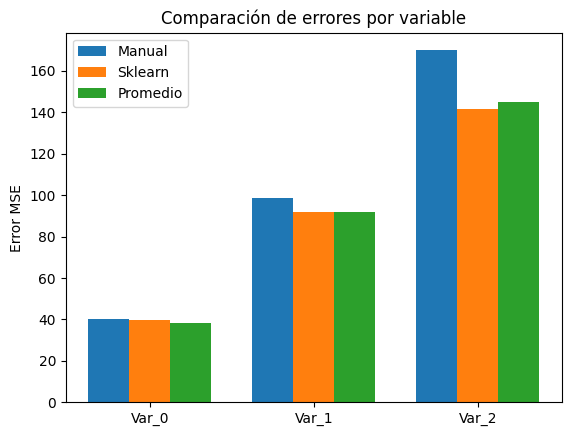

Mejor modelo por variable:
Var_0: promedio (error = 38.2584)
Var_1: sklearn (error = 91.8140)
Var_2: sklearn (error = 141.6911)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Clase para una sola variable
class RegresionLineal:
    def __init__(self, alpha=0.01, epochs=100):
        self.alpha = alpha
        self.epochs = epochs
        self.historial_parametros = {} # devuelve dos resultados
        self.historial_errores = [] # devuelve dos resultados
        self.parametros = None
        self.modelo_sklearn = LinearRegression() # Entrenamiento modelo de regresion lineal
    def entrenar_manual(self, x, y):
        X = np.c_[np.ones(x.shape[0]), x] # creacion de matriz, primera columna = x / segunda columna = 1
        beta = np.zeros(X.shape[1]) # iniciar parametros del modelo en un vector Bo y B1

        for epoch in range(self.epochs):
            y_pred = X @ beta # calculo prediccion de vectorizada: ŷ = B1 (x) + Bo
            error = np.mean((y_pred - y) ** 2) # calculo de error = (1/2n) ∑(y - ŷ)²
            self.historial_errores.append(error) # Almacena en un vector el error en cada interaccion 
            self.historial_parametros[epoch] = beta.copy() # Actualiza los parametros del modelo

            grad = (2 / x.shape[0]) * X.T @ (y_pred - y) # Calcula el gradiente del error
            beta -= self.alpha * grad # Actualiza los parametros del modelo

        self.parametros = beta

    def entrenar_sklearn(self, x, y):
        self.modelo_sklearn.fit(x.reshape(-1, 1), y)

    def predecir_manual(self, x):
        X = np.c_[np.ones(x.shape[0]), x]
        return X @ self.parametros

    def predecir_sklearn(self, x):
        return self.modelo_sklearn.predict(x.reshape(-1, 1))

    def predecir_promedio(self, x): # predecir modelo entrenado manualmente y modelo Scikit-learn
        pred1 = self.predecir_manual(x)
        pred2 = self.predecir_sklearn(x)
        return (pred1 + pred2) / 2

    def graficar_error(self): # usar matplotlib para graficar el error en el tiempo
        plt.plot(range(self.epochs), self.historial_errores)
        plt.xlabel("Iteración")
        plt.ylabel("Error")
        plt.title("Error vs Iteración")
        plt.show()

    def graficar_modelo(self, x, y, pasos=3): # usar matplotlib como evolucion del modelo entrenado en el tiempo
        fig, ax = plt.subplots()
        ax.scatter(x, y, color='blue', label='Datos reales')

        for i in range(pasos):
            epoca = sum(range(pasos+1)) // pasos * (i+1) - 1
            beta = self.historial_parametros[epoca]
            y_pred = beta[0] + beta[1] * x
            ax.plot(x, y_pred, label=f'Epoch {epoca+1}')

        ax.legend()
        plt.title("Evolución del modelo")
        plt.show()

    def evaluar_modelos(self, x, y): # Usando el 20% de validacion 
        pred_manual = self.predecir_manual(x) # 
        pred_sklearn = self.predecir_sklearn(x)
        pred_prom = self.predecir_promedio(x)

        err_manual = mean_squared_error(y, pred_manual)
        err_sklearn = mean_squared_error(y, pred_sklearn)
        err_prom = mean_squared_error(y, pred_prom)

        return err_manual, err_sklearn, err_prom


# Clase para múltiples variables
class RegresionLinealMultiple:
    def __init__(self, alpha=0.01, epochs=100):
        self.alpha = alpha
        self.epochs = epochs
        self.modelos = {}  # Guarda modelos por variable
        self.errores = {}  # Guarda errores por variable

    def entrenar(self, X, y):
        num_vars = X.shape[1]
        for i in range(num_vars):
            xi = X[:, i]
            modelo = RegresionLineal(alpha=self.alpha, epochs=self.epochs)
            modelo.entrenar_manual(xi, y)
            modelo.entrenar_sklearn(xi, y)
            self.modelos[f'Var_{i}'] = modelo

    def evaluar(self, X_test, y_test):
        for nombre, modelo in self.modelos.items():
            idx = int(nombre.split('_')[1])
            xi_test = X_test[:, idx]
            err_manual, err_sklearn, err_prom = modelo.evaluar_modelos(xi_test, y_test)
            self.errores[nombre] = {
                'manual': err_manual,
                'sklearn': err_sklearn,
                'promedio': err_prom
            }

    def imprimir_errores(self):
        for var, errores in self.errores.items():
            print(f"{var}:")
            print(f"  Manual: {errores['manual']:.4f}")
            print(f"  Sklearn: {errores['sklearn']:.4f}")
            print(f"  Promedio: {errores['promedio']:.4f}")
            print()

    def graficar_errores(self):
        variables = list(self.errores.keys())
        manuales = [self.errores[v]['manual'] for v in variables]
        sklearns = [self.errores[v]['sklearn'] for v in variables]
        promedios = [self.errores[v]['promedio'] for v in variables]

        x = np.arange(len(variables))
        width = 0.25

        plt.bar(x - width, manuales, width, label='Manual')
        plt.bar(x, sklearns, width, label='Sklearn')
        plt.bar(x + width, promedios, width, label='Promedio')
        plt.xticks(x, variables)
        plt.ylabel("Error MSE")
        plt.title("Comparación de errores por variable")
        plt.legend()
        plt.show()

    def mejor_modelo_por_variable(self): # concluir mejor modelo variable
        mejores_modelos = {}
        for var, errores in self.errores.items():
            mejor_tipo = min(errores, key=errores.get)
            mejor_error = errores[mejor_tipo]
            mejores_modelos[var] = {
                'modelo': mejor_tipo,
                'error': mejor_error
            }
        return mejores_modelos


# Generar un dataset simulado
np.random.seed(42)
X = np.random.rand(100, 3) * 10  
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100) * 2  

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo multivariable y entrenar
multi = RegresionLinealMultiple(alpha=0.01, epochs=100)
multi.entrenar(X_train, y_train)
multi.evaluar(X_test, y_test)

# Mostrar errores por modelo
multi.imprimir_errores()

# Graficar errores
multi.graficar_errores()

# Mostrar mejor modelo por variable
mejores = multi.mejor_modelo_por_variable()
print("Mejor modelo por variable:")
for var, info in mejores.items():
    print(f"{var}: {info['modelo']} (error = {info['error']:.4f})")

